# MLT-OPPE

# OPPE Instructions

This exam will be of two hours duration and will have the following sections.

- Part-1: `NumPy` (4 questions, 20 marks)
- Part-2: Classification (8 questions, 30 marks)
- Part-3: Regression (6 questions, 30 marks)

The questions will be numbered from 1 to 18. You have to solve the questions using the colab and enter the answer on the portal. Each question will be of the NAT type.



**Colab Instructions**

- Some cells in this colab contain the data for the questions related to them and should **not** be edited. For such cells, the first entry will be the following comment:

```
# WARNING: DO NOT EDIT THIS CELL
```

- Make sure that you run all the cells before the current cell you are working with. This can be done using `Ctr + F8`. Just running the current cell repeatedly might cause a problem. `Ctr + F8` runs all the cells starting from the first one in sequence.
- Note that some questions have random numbers generated with specific seed values. So, it is important that you run the cells in the sequence in which they are presented. For such questions, you will find the following message at the end of the cell:

```
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL
```

## Part-1: NumPy [20 marks]

### Question-1 [5 marks]

The outer product between two column vectors $\mathbf{x}$ and $\mathbf{y}$ is defined as follows:

$$
\mathbf{x} \mathbf{y}^{T}
$$

Find the element in the $235^{th}$ column and $1003^{rd}$ row of the outer product of the vectors $\mathbf{x}$ and $\mathbf{y}$. Both vectors are specified as single dimensional NumPy arrays in the code-block below.

**Note**: We number rows and columns starting from 1. Rows are from top-bottom, columns are from left-right. So the 33rd column means, well, the 33rd column.

In [ ]:
# WARNING: DO NOT EDIT THIS CELL
import numpy as np
rng = np.random.default_rng(seed = 1832)
x = rng.integers(-100, 100, 2000)
y = rng.integers(-100, 100, 3000)
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL

In [ ]:
x.shape

(2000,)

In [ ]:
y.shape

(3000,)

In [ ]:
# Solution

result=np.outer(x,y)
result

array([[-3384,  4752, -7056, ...,   936,  7128, -6840],
       [ 2773, -3894,  5782, ...,  -767, -5841,  5605],
       [ -940,  1320, -1960, ...,   260,  1980, -1900],
       ...,
       [ 2632, -3696,  5488, ...,  -728, -5544,  5320],
       [ -987,  1386, -2058, ...,   273,  2079, -1995],
       [ -141,   198,  -294, ...,    39,   297,  -285]])

In [ ]:
result.shape

(2000, 3000)

In [ ]:
result[1002,234]

180

### Question-2 [5 marks]

Matrices $\mathbf{A}$ and $\mathbf{B}$ are commutative if and only if $\mathbf{A} \mathbf{B} = \mathbf{B} \mathbf{A}$. Among the six matrices given below, find the number of pairs of matrices that are commutative. Note that $(\mathbf{A}, \mathbf{B})$ is the same as $(\mathbf{B}, \mathbf{A})$ and should be counted only once. Also, $(\mathbf{A}, \mathbf{A})$ doesn't count as a valid pair.

In [ ]:
# WARNING: DO NOT EDIT THIS CELL
import numpy as np
# the six matrices, A to F
A = np.array([[2, 0], [1, -1]])
B = np.array([[3, 0], [1, 0]])
C = np.array([[1, 2], [3, 4]])
D = np.array([[4, 0], [0, 4]])
E = np.array([[1, 0], [0, 1]])
F = np.array([[1, -1], [-1, 1]])
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL

In [ ]:
# Solution
matrices = [A, B, C, D, E, F]
matrix_names = ['A', 'B', 'C', 'D', 'E', 'F']

result = []

for i in range(len(matrices)):
    for j in range(i + 1, len(matrices)):
        if np.array_equal(np.dot(matrices[i], matrices[j]), np.dot(matrices[j], matrices[i])):
            result.append((matrix_names[i], matrix_names[j]))

print(result)
len(result)

[('A', 'B'), ('A', 'D'), ('A', 'E'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


10

### Question-3 [5 marks]

Three or more lines are said to be concurrent if all of them pass through a common point. Consider the following lines:

$$
\begin{aligned}
y &= 3x - 5\\
y &= 2x\\
y &= 10\\
y &= 5x - 15\\
y &= 3x + 1\\
y &= 1 - 5x
\end{aligned}
$$

It is given that there is exactly one point in the plane through which at least $3$ lines pass. Find the exact number of lines that pass through this point. Use matplotlib to solve this problem.

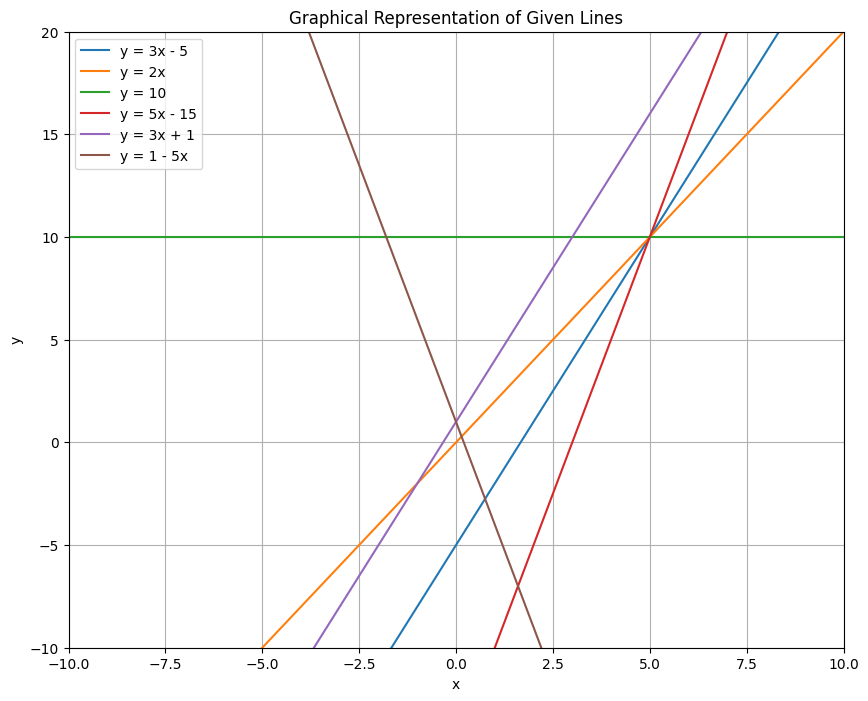

In [ ]:
# Solution
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 400)

y1 = 3*x - 5
y2 = 2*x
y3 = np.full_like(x, 10)
y4 = 5*x - 15
y5 = 3*x + 1
y6 = 1 - 5*x

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="y = 3x - 5")
plt.plot(x, y2, label="y = 2x")
plt.plot(x, y3, label="y = 10")
plt.plot(x, y4, label="y = 5x - 15")
plt.plot(x, y5, label="y = 3x + 1")
plt.plot(x, y6, label="y = 1 - 5x")


plt.xlim(-10, 10)
plt.ylim(-10, 20)

plt.grid(True)

plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Representation of Given Lines')
plt.show()


### Question-4 (5 marks)

Consider a binary classification problem with $n$ data-points in $\mathbb{R}^{d}$. $\mathbf{X}$ is the data-matrix of shape $(d, n)$ and $y$ is the label vector of shape $(n, )$. The labels are in the set $\{-1, 1\}$. Consider a linear classifer with weight vector $\mathbf{w}$ and the following classification rule:

$$
y_{\text{pred}} =
\begin{cases}
1, & \mathbf{w}^T \mathbf{x} \geq 0\\
-1, & \mathbf{w}^T \mathbf{x} < 0
\end{cases}
$$

where $\mathbf{w}$ and $\mathbf{x}$ are in $\mathbb{R}^{d}$. You are given the following arrays:

- `X`
- `y`
- `w`

Find the accuracy of the classifer on this dataset. That is, find the ratio $\frac{c}{n}$, where $c$ is the number of correctly classified points and $n$ is the size of the dataset. Enter your answer to exactly three decimal places. The answer should be between $0$ and $1$.

**Note**: No range will be provided, your answer has to be exact.

In [ ]:
# WARNING: DO NOT EDIT THIS CELL
import numpy as np
rng = np.random.default_rng(seed = 3124)
n = 1000
d = 15
X = rng.normal(size = (d, n))
y = rng.choice([-1, 1], n)
w = 2 * rng.normal(size = d) + 5
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL

In [ ]:
y

array([ 1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1

In [ ]:
# Solution
predictions = np.sign(np.dot(w, X))

correct_predictions = np.sum(predictions == y)

accuracy = correct_predictions / n
accuracy

0.505

## Part-2: Classification [30 marks]

We will be building a hard-margin SVM for a toy dataset. The data-matrix $\mathbf{X}$ and the label vector $\mathbf{y}$ are given to you. Their shapes are $(d, n)$ and $(n, )$ respectively.

### Data Cell

Do not edit the cell below at any cost!

In [ ]:
# WARNING: DO NOT EDIT THIS CELL
import numpy as np
X = np.array([[-1,0], [0,-1], [-2,1], [-2,0], [-2,-1], [-1,-1],
              [0,1], [1,0], [2,0], [2,-1], [1,1], [0,2]]).T
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL

### Question-5 [2 marks]

How many data-points does the dataset have?

In [ ]:
# Solution
X.shape

(2, 12)

In [ ]:
y.shape

(12,)

### Question-6 [2 marks]

The data-points lie in $\mathbb{R}^{d}$. What is the value of $d$?

In [ ]:
# Solution
y.shape

(12,)

### Question-7 [3 marks]

Compute the matrix $\mathbf{Y}$ that appears in the dual problem. If the shape of $\mathbf{Y}$ is $(m, n)$, enter $m + n$ as your answer.

In [ ]:
# Solution
dual_matrix_y=np.outer(y,y)*np.dot(X.T,X)
dual_matrix_y.shape

(12, 12)

### Question-8 [3 marks]

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$

where, $\mathbf{Q} = \mathbf{Y}^T \mathbf{X}^T \mathbf{X} \mathbf{Y}$. Compute the matrix $\mathbf{Q}$. Report the following expression as your answer:

$$
\sum \limits_{i = 1}^{m} \sum \limits_{j = 1}^{n} Q_{ij}
$$

where the shape of $\mathbf{Q}$ is $(m, n)$.

In [ ]:
# Solution
Y = np.diag(y)

XtX = np.dot(X.T, X)

Q = np.dot(np.dot(Y.T, XtX), Y)
np.sum(Q)

221

### Question-9 [5 marks]

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Write a function `f` that accepts `alpha` as input and returns `f(alpha)` as output. Compute the value of $f$ at the following value of $\boldsymbol{\alpha}$:

$$
\boldsymbol{\alpha} = \begin{bmatrix}1 & 1 &  1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}^T
$$

In [ ]:
# Solution
def f(alpha, Q):
    return 0.5 * np.dot(alpha.T, np.dot(Q, alpha)) - np.dot(alpha.T, np.ones(len(alpha)))

alpha = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

result = f(alpha, Q)
result

28.0

### Question-10 [5 marks]

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$. Use the zero vector as the initial valur of $\boldsymbol{\alpha}$. Report the value of $\alpha_i^{*}$ for the point $\begin{bmatrix}-1\\0\end{bmatrix}$ that is present in the training dataset. Enter your answer correct to two decimal places.

In [ ]:
# Solution
from scipy.optimize import minimize

def objective(alpha, Q):
    return 0.5 * np.dot(alpha.T, np.dot(Q, alpha)) - np.dot(alpha.T, np.ones(len(alpha)))

initial_alpha = np.zeros(X.shape[1])

bounds = [(0, None) for _ in range(X.shape[1])]

result = minimize(objective, initial_alpha, args=(Q,), bounds=bounds)

alpha_star = result.x

index = np.where((X.T == [-1, 0]).all(axis=1))[0][0]

optimal_value = alpha_star[index]
round(optimal_value, 2)

0.33

### Question-11 [5 marks]

How many support vectors does this setup have?

In [ ]:
# Solution
num_support_vectors = np.sum(alpha_star > 1e-5)

num_support_vectors

6

### Question-12 [5 marks]

Find the optimal weight vector $\mathbf{w}^*$. Round off each of the $d$ components of the vector $\mathbf{w^{*}}$ to the nearest integer and then report your answer as the sum of the components of the vector:

$$
\sum \limits_{i = 1}^{d} w^{*}_i
$$

In [ ]:
# Solution
w_star = np.dot(X, alpha_star * y)

w_star_rounded = np.round(w_star)

sum_w_star = np.sum(w_star_rounded)

sum_w_star

-2.0

## Part-3: Ridge Regression

Run the following cell to get the training and test dataset. The following variables are used in the cell:

`X_train` = Training dataset of shape `d × n`

`y_train` = label vector corresponding to training dataset

`X_test` = Test dataset

`y_test` = label vector corresponding to test dataset


In [ ]:
import numpy as np
## Synthetic data
### DO NOT edit this cell ###
np.random.seed(42)

num_samples = 100
num_features = 5


## Training Dataset

X_train = np.random.randn(num_samples, num_features).T
true_coef = np.random.randn(num_features)
noise = 0.01* np.random.randn(num_samples)
y_train = np.dot(X_train.T, true_coef) + noise

## Test Dataset
X_test = np.random.randn(50, num_features).T
true_coef_t = np.random.randn(num_features)
noise_t = 0.1* np.random.randn(50)
y_test = np.dot(X_test.T, true_coef_t) + noise_t
# ALWAYS RUN THIS CELL BEFORE RUNNING YOUR SOLUTION CELL

### Question-13 [3 marks]

Add the dummy feature in both training and test dataset. If we learn the ridge regression model on the same training dataset, how many weights need to be learned by the model?



In [ ]:
X_train.shape

(5, 100)

In [ ]:
y_train.shape

(100,)

In [ ]:
#5+1 for weights

In [ ]:
# Solution
dummy_feature_train = np.ones((1, X_train.shape[1]))
dummy_feature_test = np.ones((1, X_test.shape[1]))

X_train_with_bias = np.vstack([X_train, dummy_feature_train])
X_test_with_bias = np.vstack([X_test, dummy_feature_test])

num_weights = X_train_with_bias.shape[0]

num_weights

6

### Question-14 [5 marks]

Learn the ridge regression model on the training dataset using the regulariztion parameters $\lambda = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]$. Which value of $\lambda$ gives the least training loss? Training loss is defined as

$$\text{RMSE}  =  \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$


In [ ]:
# Solution
import numpy as np

def ridge_regression(X, y, lambda_):
    d = X.shape[0]
    I = np.eye(d)
    I[-1, -1] = 0
    return np.linalg.inv(X @ X.T + lambda_ * I) @ X @ y

def compute_rmse(X, y, w):
    y_pred = X.T @ w
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    return rmse

lambdas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

rmse_values = []
for lambda_ in lambdas:
    w = ridge_regression(X_train_with_bias, y_train, lambda_)
    rmse = compute_rmse(X_train_with_bias, y_train, w)
    rmse_values.append(rmse)

best_lambda = lambdas[np.argmin(rmse_values)]
best_rmse = min(rmse_values)

best_lambda


0.01

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

ridge = Ridge(fit_intercept=False)
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)

X_train = X_train[:len(y_train), :]
grid_search.fit(X_train, y_train)

best_lambda = grid_search.best_params_['alpha']
best_rmse = -grid_search.best_score_
best_lambda

ValueError: Found input variables with inconsistent numbers of samples: [5, 100]

### Question-15 [5 marks]

Learn the ridge regression model on the training dataset using the regulariztion parameters $\lambda = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]$. Which value of $\lambda$ gives the least test loss?

In [ ]:
# Solution
test_rmse_values = []
for lambda_ in lambdas:
    w = ridge_regression(X_train_with_bias, y_train, lambda_)
    test_rmse = compute_rmse(X_test_with_bias, y_test, w)
    test_rmse_values.append(test_rmse)

best_lambda_test = lambdas[np.argmin(test_rmse_values)]
best_test_rmse = min(test_rmse_values)

best_lambda_test

### Question-16 [4 marks]

Divide the training dataset (dummy feature added training dataset) into 5 folds. Do not shuffle the dataset. That is, if there are 100 training examples, first fold contains the data points with indices 0 to 19. Second fold cantains the data points with indices 20 to 39 and so on.

Use cross validation to find the best value of $\lambda$ out of $[0.01, 0.1, 1.0, 10.0]$. In $i^{th}$ iteration, use $i^{th}$ fold as validation set and remaining four as training set.

The best value of $\lambda$ will be one which gives the least mean validation loss (mean of validation loss on all five folds). Validation loss is defined as the root mean squared loss.

Enter the best value of $\lambda$.



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

ridge = Ridge(fit_intercept=True)

kf = KFold(n_splits=5, shuffle=False)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf, scoring='neg_root_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

best_lambda = grid_search.best_params_['alpha']
best_rmse = -grid_search.best_score_
best_lambda

### Question-17 [6 marks]

Find the mean validation loss using the best $\lambda$ obtained in question 16. Enter the answer correct to three decimal places.





In [ ]:
# Solution
from sklearn.model_selection import cross_val_score
neg_rmse_scores = cross_val_score(Ridge(alpha=best_lambda), X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

mean_validation_rmse = -np.mean(neg_rmse_scores)

mean_validation_rmse

### Question-18 [7 marks]

Train the ridge regression model on the entire training dataset using the
best $\lambda$ obtained in question 16 and find the loss on the test dataset. Enter the answer correct to two decimal places.